<a href="https://colab.research.google.com/github/sabiab/ORES-5160/blob/main/final/final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# HDS5210 - Final Project

**Project Background** - Over 38 million people globally live with HIV, with 1.7 million new cases annually. Sub-Saharan Africa accounts for over two-thirds of new cases.  Understanding drivers of these inequities across geographic, social, economic, and healthcare system factors through advanced modeling can help inform resource prioritization for maximal impact.

As a Masters Health Data Science project, I will analyze and model available HIV epidemiological indicators for 2018.

**Proposed Approach** - Employ multivariate regression analysis, unsupervised clustering, cohort survival analysis and interactive visualizations to assess HIV outcome variability globally and identify strategic needs for interventions or capacity building to support HIV.

In [1]:
# importing necessary libraries
import pandas as pd

# Data Source 1
# Data Handling

Dataset 1 - Link - https://www.kaggle.com/datasets/imdevskp/hiv-aids-dataset/data?select=no_of_deaths_by_country_clean.csv

Variable in Dataset

1. Country
2. Year
3. Count - Number of deaths due to HIV/AIDS
4. Count_median - Number of deaths due to HIV/AIDS - median
5. Count_min - Number of deaths due to HIV/AIDS - Minimum
6. Count_max - Number of deaths due to HIV/AIDS - Maximum
7. WHO Region

In [2]:
# Loading the dataset
deaths_by_country = pd.read_csv("no_of_deaths_by_country_clean.csv")
deaths_by_country

,Country,Year,Count,Count_median,Count_min,Count_max,WHO Region
0,Afghanistan,2018,500[200–610],500.0,200.0,610.0,Eastern Mediterranean
1,Albania,2018,na,NaN,NaN,NaN,Europe
2,Algeria,2018,200[200–200],200.0,200.0,200.0,Africa
3,Angola,2018,14000[9500–18000],14000.0,9500.0,18000.0,Africa
4,Argentina,2018,1700[1300–2100],1700.0,1300.0,2100.0,Americas
...,...,...,...,...,...,...,...
505,Venezuela (Bolivarian Republic of),2000,na,NaN,NaN,NaN,Americas
506,Viet Nam,2000,6100[4300–7800],6100.0,4300.0,7800.0,Western Pacific
507,Yemen,2000,100[100–200],100.0,100.0,200.0,Eastern Mediterranean
508,Zambia,2000,62000[49000–81000],62000.0,49000.0,81000.0,Africa


In [3]:
# Identifying Null Values
deaths_by_country.isna().sum()

Country           0
Year              0
Count             0
Count_median    110
Count_min       110
Count_max       110
WHO Region        0
dtype: int64

In [4]:
# handling null values by filling them with 0
deaths_by_country = deaths_by_country.fillna(0)
deaths_by_country

,Country,Year,Count,Count_median,Count_min,Count_max,WHO Region
0,Afghanistan,2018,500[200–610],500.0,200.0,610.0,Eastern Mediterranean
1,Albania,2018,na,0.0,0.0,0.0,Europe
2,Algeria,2018,200[200–200],200.0,200.0,200.0,Africa
3,Angola,2018,14000[9500–18000],14000.0,9500.0,18000.0,Africa
4,Argentina,2018,1700[1300–2100],1700.0,1300.0,2100.0,Americas
...,...,...,...,...,...,...,...
505,Venezuela (Bolivarian Republic of),2000,na,0.0,0.0,0.0,Americas
506,Viet Nam,2000,6100[4300–7800],6100.0,4300.0,7800.0,Western Pacific
507,Yemen,2000,100[100–200],100.0,100.0,200.0,Eastern Mediterranean
508,Zambia,2000,62000[49000–81000],62000.0,49000.0,81000.0,Africa


# Data Source 2
# Data Handling

Dataset 2 - Link - https://www.kaggle.com/datasets/imdevskp/hiv-aids-dataset/data?select=no_of_people_living_with_hiv_by_country_clean.csv

Variable in Dataset

1. Country
2. Year
3. Count - Number of Livings due to HIV/AIDS
4. Count_median - Number of Livings due to HIV/AIDS - median
5. Count_min - Number of Livings due to HIV/AIDS - Minimum
6. Count_max - Number of Livings due to HIV/AIDS - Maximum
7. WHO Region

In [5]:
# Loading the Dataset
livings_by_country = pd.read_csv("no_of_people_living_with_hiv_by_country_clean.csv")
livings_by_country

,Country,Year,Count,Count_median,Count_min,Count_max,WHO Region
0,Afghanistan,2018,7200[4100–11000],7200.0,4100.0,11000.0,Eastern Mediterranean
1,Albania,2018,na,NaN,NaN,NaN,Europe
2,Algeria,2018,16000[15000–17000],16000.0,15000.0,17000.0,Africa
3,Angola,2018,330000[290000–390000],330000.0,290000.0,390000.0,Africa
4,Argentina,2018,140000[130000–150000],140000.0,130000.0,150000.0,Americas
...,...,...,...,...,...,...,...
675,Venezuela (Bolivarian Republic of),2000,na,NaN,NaN,NaN,Americas
676,Viet Nam,2000,120000[110000–130000],120000.0,110000.0,130000.0,Western Pacific
677,Yemen,2000,1100[680–2500],1100.0,680.0,2500.0,Eastern Mediterranean
678,Zambia,2000,890000[800000–1000000],890000.0,800000.0,1000000.0,Africa


In [6]:
# finding the number of null values
livings_by_country.isna().sum()

Country           0
Year              0
Count             0
Count_median    127
Count_min       127
Count_max       127
WHO Region        0
dtype: int64

In [7]:
# filling the null values with 0
livings_by_country = livings_by_country.fillna(0)
livings_by_country

,Country,Year,Count,Count_median,Count_min,Count_max,WHO Region
0,Afghanistan,2018,7200[4100–11000],7200.0,4100.0,11000.0,Eastern Mediterranean
1,Albania,2018,na,0.0,0.0,0.0,Europe
2,Algeria,2018,16000[15000–17000],16000.0,15000.0,17000.0,Africa
3,Angola,2018,330000[290000–390000],330000.0,290000.0,390000.0,Africa
4,Argentina,2018,140000[130000–150000],140000.0,130000.0,150000.0,Americas
...,...,...,...,...,...,...,...
675,Venezuela (Bolivarian Republic of),2000,na,0.0,0.0,0.0,Americas
676,Viet Nam,2000,120000[110000–130000],120000.0,110000.0,130000.0,Western Pacific
677,Yemen,2000,1100[680–2500],1100.0,680.0,2500.0,Eastern Mediterranean
678,Zambia,2000,890000[800000–1000000],890000.0,800000.0,1000000.0,Africa


# Data Source 3
# Data Handling

Dataset 3 Link - https://www.census.gov/data-tools/demo/hiv/#/map?s_datacode=R

In [8]:
# Loaded the set
hiv = pd.read_excel("hiv_joined_data.xlsx")
hiv

,Record ID,Data Type,Age Category Code,Country Code,Geographic Area,Geographic Code,Reference Date,Population Subgroup,Subpop Code,Virus Type,...,Comments,Specimen Type,Test Type,Quality,Site Name,Country,Author,Year,Title,Publication Information
0,2,P,A,SEN,Dakar,C,1991-1993,Pregnant women,G,HIV2,...,Apr. 91 - Jan. 93.,B,"ELISA, WB",A,Le Dantec Hospital,Senegal,"Abbott, R. C., A. Ndour-Sarr, A. Diouf, et al.",1994,Risk Factors for HIV-1 and HIV-2 Infection in ...,Journal of Acquired Immune Deficiency Syndrome...
1,3,P,A,SEN,Dakar,C,1991-1993,Pregnant women,G,HIV1&2,...,Apr. 91 - Jan. 93.,B,"ELISA, WB",A,Le Dantec Hospital,Senegal,"Abbott, R. C., A. Ndour-Sarr, A. Diouf, et al.",1994,Risk Factors for HIV-1 and HIV-2 Infection in ...,Journal of Acquired Immune Deficiency Syndrome...
2,1,P,A,SEN,Dakar,C,1991-1993,Pregnant women,G,HIV1,...,Apr. 91 - Jan. 93.,B,"ELISA, WB",A,Le Dantec Hospital,Senegal,"Abbott, R. C., A. Ndour-Sarr, A. Diouf, et al.",1994,Risk Factors for HIV-1 and HIV-2 Infection in ...,Journal of Acquired Immune Deficiency Syndrome...
3,6,R,A,ZAF,National,N,1988,Cumulative AIDS cases - IVDU,I,AIDS,...,Reported as of Nov. 88.,NaN,NaN,A,National,South Africa,"Advisory Group, The",1989,Update: AIDS in the RSA (November 1988),"South African Medical Journal, vol. 75, p. 95."
4,4,R,A,ZAF,National,N,1988,Cumulative pediatric AIDS cases,C,AIDS,...,Reported as of Nov. 88.,NaN,NaN,A,National,South Africa,"Advisory Group, The",1989,Update: AIDS in the RSA (November 1988),"South African Medical Journal, vol. 75, p. 95."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
226315,226314,P,A,CHN,Chongzuo & Fangchenggang cities,U,2016-2018,Sex workers,P,HIV1,...,Located in Guangxi Province. Included long-te...,BW,"ELISA*2, WB",A,"Chongzuo, Fangchenggang cities","China, Mainland","Zhang, Y., B. Liang, D. Liu, et al.",2020,Migrant Female Sex Workers Working at the Sino...,"AIDS Research and Therapy, vol. 17, article no..."
226316,226320,P,A,PAK,Nankana,U,2019,IVDU,I,HIV,...,Located in the Punjab Province. Jan. - May 19...,B,RAPID*3,A,Nankana,Pakistan,"Zahra, A., M. A. Saleem, H. Javed, et al.",2021,Prevalence of HCV-HIV Co-Infection with Intrav...,"Pakistan Journal of Zoology, vol. 54, issue 5,..."
226317,226319,P,A,PAK,Faisalabad,U,2019,IVDU,I,HIV,...,Located in the Punjab Province. Jan. - May 19...,B,RAPID*3,A,Faisalabad,Pakistan,"Zahra, A., M. A. Saleem, H. Javed, et al.",2021,Prevalence of HCV-HIV Co-Infection with Intrav...,"Pakistan Journal of Zoology, vol. 54, issue 5,..."
226318,226318,P,A,PAK,Sargodha,U,2019,IVDU,I,HIV,...,Located in the Punjab Province. Jan. - May 19...,B,RAPID*3,A,Sargodha,Pakistan,"Zahra, A., M. A. Saleem, H. Javed, et al.",2021,Prevalence of HCV-HIV Co-Infection with Intrav...,"Pakistan Journal of Zoology, vol. 54, issue 5,..."


In [9]:
hiv.columns

Index(['Record ID', 'Data Type', 'Age Category Code', 'Country Code',
       'Geographic Area', 'Geographic Code', 'Reference Date',
       'Population Subgroup', 'Subpop Code', 'Virus Type', 'Source ID',
       'Sequence', 'Age', 'Sex', 'Num of Deaths', 'Num Cases',
       'Prevalence Rate', 'Sample Size', 'Incidence Rate', 'Comments',
       'Specimen Type', 'Test Type', 'Quality', 'Site Name', 'Country',
       'Author', 'Year', 'Title', 'Publication Information'],
      dtype='object')

In [10]:
# Dropping the unnecessary columns
hiv = hiv.drop(columns = {
    'Data Type', 'Age Category Code', 'Geographic Code', 'Subpop Code', 'Source ID', 'Sequence', 'Incidence Rate', 'Comments', 'Specimen Type','Test Type', 'Quality', 'Reference Date', 'Country Code', 'Geographic Area',
    'Author', 'Title', 'Publication Information'})

In [11]:
hiv

,Record ID,Population Subgroup,Virus Type,Age,Sex,Num of Deaths,Num Cases,Prevalence Rate,Sample Size,Site Name,Country,Year
0,2,Pregnant women,HIV2,ALL,F,-1,44,0.46,9518,Le Dantec Hospital,Senegal,1994
1,3,Pregnant women,HIV1&2,ALL,F,-1,2,0.02,9518,Le Dantec Hospital,Senegal,1994
2,1,Pregnant women,HIV1,ALL,F,-1,26,0.27,9518,Le Dantec Hospital,Senegal,1994
3,6,Cumulative AIDS cases - IVDU,AIDS,ALL,B,-1,1,-1.00,-1,National,South Africa,1989
4,4,Cumulative pediatric AIDS cases,AIDS,ALL,B,-1,3,-1.00,-1,National,South Africa,1989
...,...,...,...,...,...,...,...,...,...,...,...,...
226315,226314,Sex workers,HIV1,ALL,F,-1,22,1.32,1667,"Chongzuo, Fangchenggang cities","China, Mainland",2020
226316,226320,IVDU,HIV,ALL,M,-1,6,28.57,21,Nankana,Pakistan,2021
226317,226319,IVDU,HIV,ALL,M,-1,12,14.46,83,Faisalabad,Pakistan,2021
226318,226318,IVDU,HIV,ALL,M,-1,17,17.00,100,Sargodha,Pakistan,2021


In [12]:
# Filtering the data for the year 2018
hiv_2018 = hiv[hiv['Year'] == 2018]
hiv_2018

,Record ID,Population Subgroup,Virus Type,Age,Sex,Num of Deaths,Num Cases,Prevalence Rate,Sample Size,Site Name,Country,Year
6970,6974,IVDU,HIV,ALL,B,-1,90,16.04,561,Sanpya Hospital; one mental health hospital,Burma,2018
6971,6975,Drug users,HIV,ALL,B,-1,3,25.00,12,Sanpya Hospital; one mental health hospital,Burma,2018
6972,6982,IVDU & drug users,HIV,ALL,B,-1,-1,15.00,-1,Sanpya Hospital; one mental health hospital,Burma,2018
6973,6981,IVDU & drug users,HIV,ALL,B,-1,-1,17.00,-1,Sanpya Hospital; one mental health hospital,Burma,2018
6974,6980,IVDU & drug users,HIV,ALL,B,-1,-1,15.00,-1,Sanpya Hospital; one mental health hospital,Burma,2018
...,...,...,...,...,...,...,...,...,...,...,...,...
226127,226124,Adults,HIV,ALL,M,-1,-1,11.80,-1,Siaya county,Kenya,2018
226128,226123,Adults,HIV,ALL,B,-1,-1,17.10,3344,Siaya county,Kenya,2018
226129,226132,STI pts.,HIV1,ALL,B,-1,12,-1.00,408,Mwanza district,Malawi,2018
226130,226131,STI pts.,HIV1,ALL,B,-1,21,-1.00,500,Mulanje district,Malawi,2018


# Merging the Datasets

I defined a merge_datasets function to merge two datasets (dataset1 and dataset2) on a specified column (on_column). This returns the merged dataset. I  then called this function to merge two datasets called deaths_by_country and livings_by_country on the columns Country, Year, and WHO Region. This returned a merged dataset deaths_livings.

Next, I renamed several columns in deaths_livings to have more descriptive names related to number of deaths and number of livings, by replacing generic Count column names. After that, i merged deaths_livings with another dataset called hiv, joined on the columns Country and Year. This resulted in a new merged dataset, hiv_joined.

I then filtered hiv_joined to only keep rows where Year is 2018, stored as hiv_joined_2018. Finally, I dropped the 'Site Name' column from hiv_joined_2018.

In [13]:
def merge_datasets(dataset1, dataset2, on_column):
    """
    Merge two datasets based on a specified column.
        The first dataset to be merged
        The second dataset to be merged
        The column on which the datasets should be merged

    Returns the merged dataset
    """
    merged_dataset = pd.merge(dataset1, dataset2, on=on_column)
    return merged_dataset

In [14]:
#Joining the datasets 'deaths_by_country' and 'livings_by_country'
deaths_livings = merge_datasets(deaths_by_country, livings_by_country, ['Country','Year','WHO Region'])
deaths_livings

,Country,Year,Count_x,Count_median_x,Count_min_x,Count_max_x,WHO Region,Count_y,Count_median_y,Count_min_y,Count_max_y
0,Afghanistan,2018,500[200–610],500.0,200.0,610.0,Eastern Mediterranean,7200[4100–11000],7200.0,4100.0,11000.0
1,Albania,2018,na,0.0,0.0,0.0,Europe,na,0.0,0.0,0.0
2,Algeria,2018,200[200–200],200.0,200.0,200.0,Africa,16000[15000–17000],16000.0,15000.0,17000.0
3,Angola,2018,14000[9500–18000],14000.0,9500.0,18000.0,Africa,330000[290000–390000],330000.0,290000.0,390000.0
4,Argentina,2018,1700[1300–2100],1700.0,1300.0,2100.0,Americas,140000[130000–150000],140000.0,130000.0,150000.0
...,...,...,...,...,...,...,...,...,...,...,...
505,Venezuela (Bolivarian Republic of),2000,na,0.0,0.0,0.0,Americas,na,0.0,0.0,0.0
506,Viet Nam,2000,6100[4300–7800],6100.0,4300.0,7800.0,Western Pacific,120000[110000–130000],120000.0,110000.0,130000.0
507,Yemen,2000,100[100–200],100.0,100.0,200.0,Eastern Mediterranean,1100[680–2500],1100.0,680.0,2500.0
508,Zambia,2000,62000[49000–81000],62000.0,49000.0,81000.0,Africa,890000[800000–1000000],890000.0,800000.0,1000000.0


In [15]:
# renaming the columns
deaths_livings = deaths_livings.rename(columns ={
    'Count_x': 'No_of_deaths',
    'Count_median_x' : 'No_of_deaths_median',
    'Count_min_x' : 'No_of_death_min',
    'Count_max_x' : 'No_of_death_max',
    'Count_y' : 'No_of_livings',
    'Count_median_y' : 'No_of_livings_median',
    'Count_min_y' : 'No_of_livings_min',
    'Count_max_y' : 'No_of_livings_max'
})
deaths_livings

,Country,Year,No_of_deaths,No_of_deaths_median,No_of_death_min,No_of_death_max,WHO Region,No_of_livings,No_of_livings_median,No_of_livings_min,No_of_livings_max
0,Afghanistan,2018,500[200–610],500.0,200.0,610.0,Eastern Mediterranean,7200[4100–11000],7200.0,4100.0,11000.0
1,Albania,2018,na,0.0,0.0,0.0,Europe,na,0.0,0.0,0.0
2,Algeria,2018,200[200–200],200.0,200.0,200.0,Africa,16000[15000–17000],16000.0,15000.0,17000.0
3,Angola,2018,14000[9500–18000],14000.0,9500.0,18000.0,Africa,330000[290000–390000],330000.0,290000.0,390000.0
4,Argentina,2018,1700[1300–2100],1700.0,1300.0,2100.0,Americas,140000[130000–150000],140000.0,130000.0,150000.0
...,...,...,...,...,...,...,...,...,...,...,...
505,Venezuela (Bolivarian Republic of),2000,na,0.0,0.0,0.0,Americas,na,0.0,0.0,0.0
506,Viet Nam,2000,6100[4300–7800],6100.0,4300.0,7800.0,Western Pacific,120000[110000–130000],120000.0,110000.0,130000.0
507,Yemen,2000,100[100–200],100.0,100.0,200.0,Eastern Mediterranean,1100[680–2500],1100.0,680.0,2500.0
508,Zambia,2000,62000[49000–81000],62000.0,49000.0,81000.0,Africa,890000[800000–1000000],890000.0,800000.0,1000000.0


In [16]:
#merging the above dataset with 'hiv'
hiv_joined = merge_datasets(deaths_livings, hiv, ['Country','Year'])
hiv_joined

,Country,Year,No_of_deaths,No_of_deaths_median,No_of_death_min,No_of_death_max,WHO Region,No_of_livings,No_of_livings_median,No_of_livings_min,...,Record ID,Population Subgroup,Virus Type,Age,Sex,Num of Deaths,Num Cases,Prevalence Rate,Sample Size,Site Name
0,Angola,2018,14000[9500–18000],14000.0,9500.0,18000.0,Africa,330000[290000–390000],330000.0,290000.0,...,124071,Sex workers,HIV,ALL,F,-1,146,7.78,1876,Five Provinces
1,Angola,2018,14000[9500–18000],14000.0,9500.0,18000.0,Africa,330000[290000–390000],330000.0,290000.0,...,124072,MSM,HIV,ALL,M,-1,19,1.87,1016,Five Provinces
2,Angola,2018,14000[9500–18000],14000.0,9500.0,18000.0,Africa,330000[290000–390000],330000.0,290000.0,...,153411,Blood donors,"HIV1,2",ALL,B,-1,22,2.76,796,Clinica Girassol
3,Angola,2018,14000[9500–18000],14000.0,9500.0,18000.0,Africa,330000[290000–390000],330000.0,290000.0,...,153410,Blood donors,"HIV1,2",ALL,B,-1,43,9.77,440,Clinica Girassol
4,Angola,2018,14000[9500–18000],14000.0,9500.0,18000.0,Africa,330000[290000–390000],330000.0,290000.0,...,153409,Blood donors,"HIV1,2",ALL,B,-1,39,9.92,393,Clinica Girassol
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15572,Zimbabwe,2000,120000[98000–150000],120000.0,98000.0,150000.0,Africa,1600000[1400000–1900000],1600000.0,1400000.0,...,220123,Pregnant women,HIV,15Y19Y,F,-1,-1,27.80,1286,19 sites
15573,Zimbabwe,2000,120000[98000–150000],120000.0,98000.0,150000.0,Africa,1600000[1400000–1900000],1600000.0,1400000.0,...,220127,Pregnant women,HIV,35Y39Y,F,-1,-1,31.20,284,19 sites
15574,Zimbabwe,2000,120000[98000–150000],120000.0,98000.0,150000.0,Africa,1600000[1400000–1900000],1600000.0,1400000.0,...,220135,Pregnant women,HIV,35Y39Y,F,-1,-1,26.70,-1,Rural sites
15575,Zimbabwe,2000,120000[98000–150000],120000.0,98000.0,150000.0,Africa,1600000[1400000–1900000],1600000.0,1400000.0,...,220144,Pregnant women,HIV,ALL,F,-1,-1,32.10,327,Bindura Chipadze


In [17]:
# filtering the data with respect to year - 2018
hiv_joined_2018 = hiv_joined[hiv_joined['Year'] == 2018]
hiv_joined_2018

,Country,Year,No_of_deaths,No_of_deaths_median,No_of_death_min,No_of_death_max,WHO Region,No_of_livings,No_of_livings_median,No_of_livings_min,...,Record ID,Population Subgroup,Virus Type,Age,Sex,Num of Deaths,Num Cases,Prevalence Rate,Sample Size,Site Name
0,Angola,2018,14000[9500–18000],14000.0,9500.0,18000.0,Africa,330000[290000–390000],330000.0,290000.0,...,124071,Sex workers,HIV,ALL,F,-1,146,7.78,1876,Five Provinces
1,Angola,2018,14000[9500–18000],14000.0,9500.0,18000.0,Africa,330000[290000–390000],330000.0,290000.0,...,124072,MSM,HIV,ALL,M,-1,19,1.87,1016,Five Provinces
2,Angola,2018,14000[9500–18000],14000.0,9500.0,18000.0,Africa,330000[290000–390000],330000.0,290000.0,...,153411,Blood donors,"HIV1,2",ALL,B,-1,22,2.76,796,Clinica Girassol
3,Angola,2018,14000[9500–18000],14000.0,9500.0,18000.0,Africa,330000[290000–390000],330000.0,290000.0,...,153410,Blood donors,"HIV1,2",ALL,B,-1,43,9.77,440,Clinica Girassol
4,Angola,2018,14000[9500–18000],14000.0,9500.0,18000.0,Africa,330000[290000–390000],330000.0,290000.0,...,153409,Blood donors,"HIV1,2",ALL,B,-1,39,9.92,393,Clinica Girassol
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3105,Zimbabwe,2018,22000[17000–27000],22000.0,17000.0,27000.0,Africa,1300000[1100000–1500000],1300000.0,1100000.0,...,214907,Adults - uncircumcised,HIV,50Y+,M,-1,-1,2.60,-1,National
3106,Zimbabwe,2018,22000[17000–27000],22000.0,17000.0,27000.0,Africa,1300000[1100000–1500000],1300000.0,1100000.0,...,214906,Adults - uncircumcised,HIV,25Y49Y,M,-1,-1,1.50,-1,National
3107,Zimbabwe,2018,22000[17000–27000],22000.0,17000.0,27000.0,Africa,1300000[1100000–1500000],1300000.0,1100000.0,...,214905,Adults - uncircumcised,HIV,20Y24Y,M,-1,-1,0.80,-1,National
3108,Zimbabwe,2018,22000[17000–27000],22000.0,17000.0,27000.0,Africa,1300000[1100000–1500000],1300000.0,1100000.0,...,214904,Adolescents - uncircumcised,HIV,15Y19Y,M,-1,-1,0.80,-1,National


In [18]:
hiv_joined_2018 = hiv_joined_2018.drop(columns = 'Site Name')
hiv_joined_2018.columns

Index(['Country', 'Year', 'No_of_deaths', 'No_of_deaths_median',
       'No_of_death_min', 'No_of_death_max', 'WHO Region', 'No_of_livings',
       'No_of_livings_median', 'No_of_livings_min', 'No_of_livings_max',
       'Record ID', 'Population Subgroup', 'Virus Type', 'Age', 'Sex',
       'Num of Deaths', 'Num Cases', 'Prevalence Rate', 'Sample Size'],
      dtype='object')

# Visualization - 1
The graph shows the median number of deaths by HIV per country. The countries with the highest median number of deaths are South Africa, Mozambique, Nigeria, Indonesia

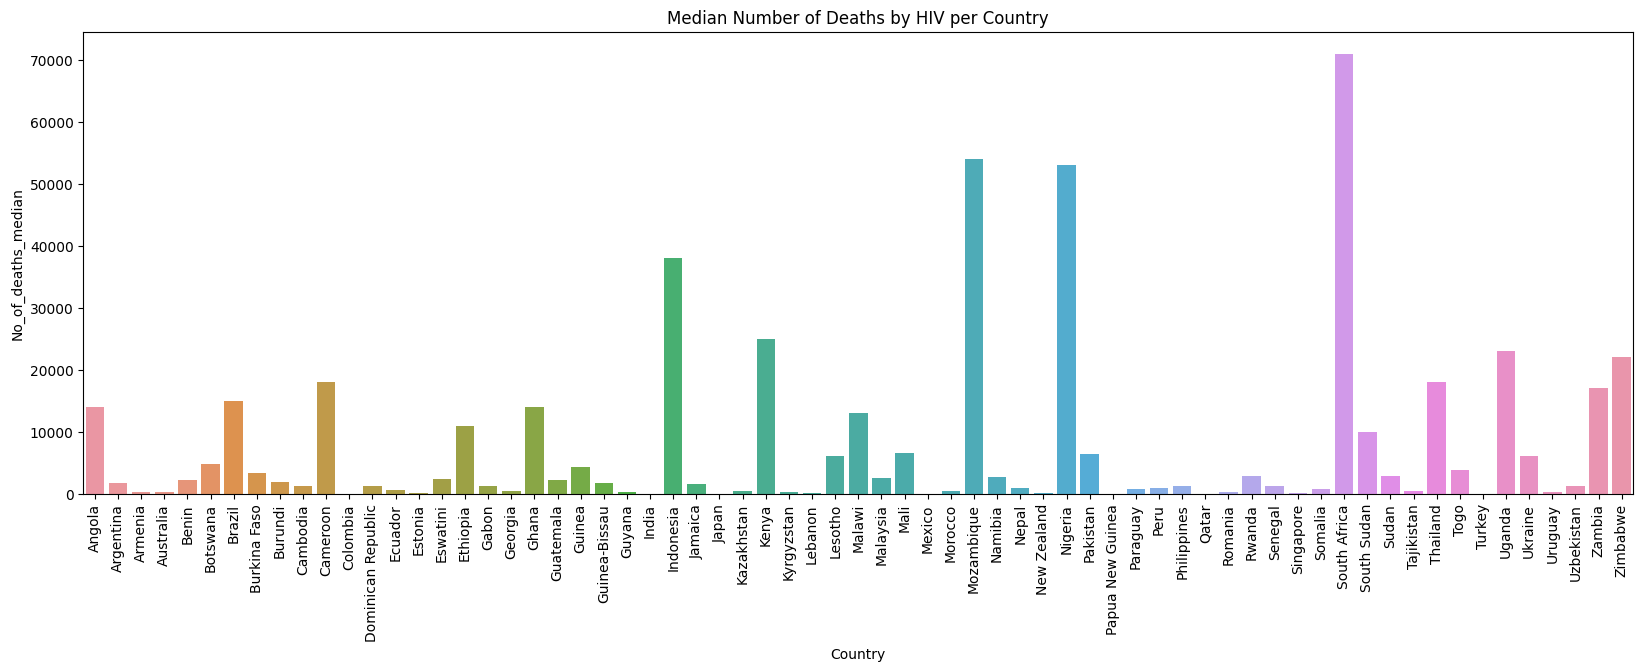

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(20, 6))
sns.barplot(x='Country', y='No_of_deaths_median', data=hiv_joined_2018)
plt.title('Median Number of Deaths by HIV per Country')
plt.xticks(rotation=90)
plt.show()

# Visualization 2

Below is a bar graph showing the median number of people living with HIV per country in 2018. The graph shows that the countries with the highest median number of people living with HIV are South Africa, Nigeria, Mozambique, and Kenya

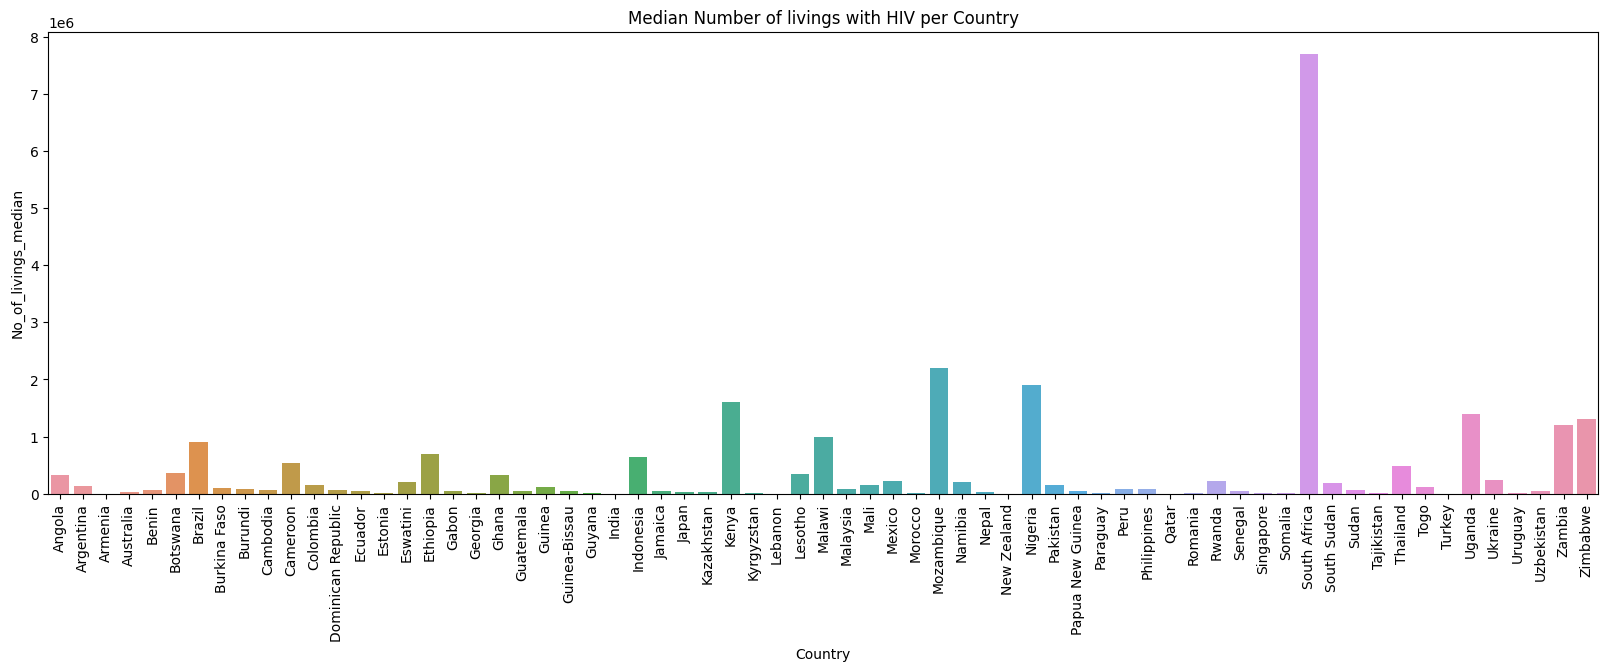

In [20]:
plt.figure(figsize=(20, 6))
sns.barplot(x='Country', y='No_of_livings_median', data=hiv_joined_2018)
plt.title('Median Number of livings with HIV per Country')
plt.xticks(rotation=90)
plt.show()

# Visualization 3

The histogram shows the distribution of HIV prevalence rates in 2018. The histogram shows that the most common HIV prevalence rates are between 0 and 20%, with a peak at around 5%. There are also a significant number of countries with HIV prevalence rates above 20%, and a small number of countries with HIV prevalence rates above 60%.

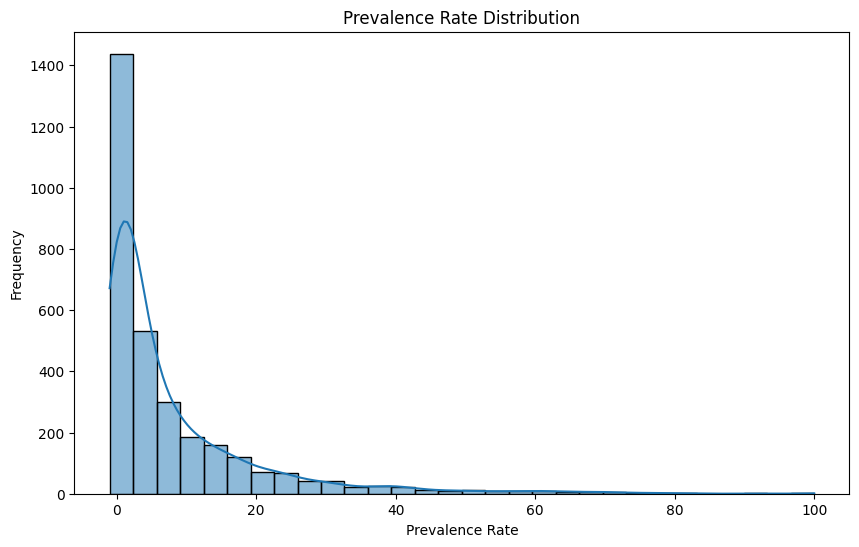

In [21]:
plt.figure(figsize=(10, 6))
sns.histplot(hiv_joined_2018['Prevalence Rate'], bins=30, kde=True)
plt.title('Prevalence Rate Distribution')
plt.xlabel('Prevalence Rate')
plt.ylabel('Frequency')
plt.show()

# Visualization 4

The violin plot shows the median number of deaths by HIV per WHO region in 2018. The plot shows that the WHO African region has the highest median number of deaths by HIV, followed by the WHO Americas region, the WHO Eastern Mediterranean region, the WHO South-East Asia region, the WHO Western Pacific region, and the WHO European region.

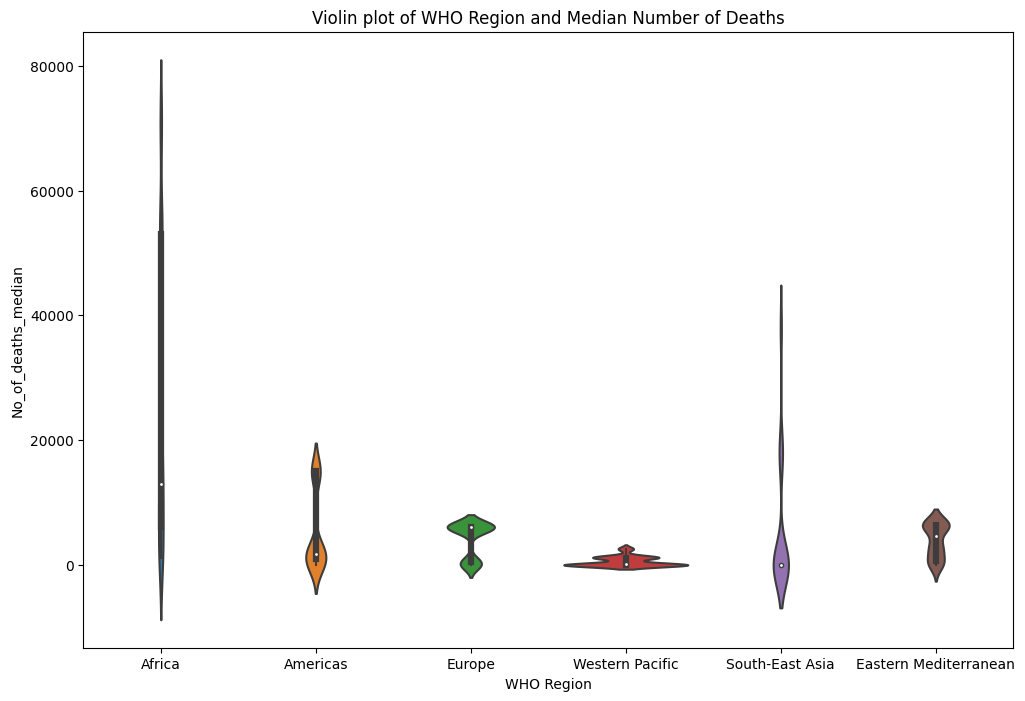

In [22]:
plt.figure(figsize=(12, 8))
sns.violinplot(x='WHO Region', y='No_of_deaths_median', data=hiv_joined_2018)
plt.title('Violin plot of WHO Region and Median Number of Deaths')
plt.show()

# Visualization 5

The below count plot shows the distribution of HIV cases by virus type in 2018. The most common virus type is HIV-1, followed by HIV-2 and HIV-1/2.

HIV-1 is the most common type of HIV worldwide. It is responsible for the vast majority of HIV infections and AIDS-related deaths. HIV-2 is less common than HIV-1, and it is found primarily in West Africa. HIV-1/2 is a rare type of HIV that is a combination of HIV-1 and HIV-2.

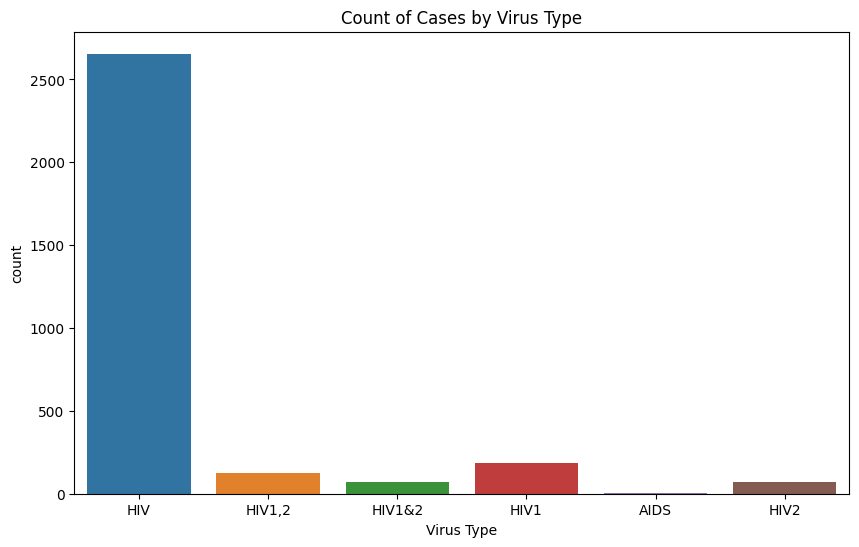

In [23]:
plt.figure(figsize=(10, 6))
sns.countplot(x='Virus Type', data=hiv_joined_2018)
plt.title('Count of Cases by Virus Type')
plt.show()

# Aggregating

Defined a custom aggregation unction called "custom_agg_function" that calculates the difference between the maximum and minimum value for a given column. Applied the custom aggregation function on the "Num of Deaths" column after grouping by "Country" to get the range of deaths values per country. Store this in "custom_agg_result". Calculated some summary statistics on the "Prevalence Rate" and "Sample Size" columns, grouped by the "Sex" column. Specifically, for "Prevalence Rate", you calculate the mean, median and standard deviation. For "Sample Size" you sum the values. Store these results in "summary_stats_by_sex".

In [24]:
def custom_agg_function(column):
    return column.max() - column.min()

custom_agg_result = hiv_joined_2018.groupby('Country')['Num of Deaths'].agg(custom_agg_function)
custom_agg_result

Country
Angola        0
Argentina     0
Armenia       0
Australia     0
Benin         0
             ..
Ukraine       0
Uruguay       0
Uzbekistan    0
Zambia        0
Zimbabwe      0
Name: Num of Deaths, Length: 67, dtype: int64

In [25]:
summary_stats_by_sex = hiv_joined_2018.groupby('Sex').agg({'Prevalence Rate': ['mean', 'median', 'std'], 'Sample Size': 'sum'})
summary_stats_by_sex

Prevalence Rate                   Sample Size
               mean median        std         sum
Sex                                              
B          8.699937  3.110  13.817932    32727569
F          7.466603  2.355  12.208477    12968992
M          7.284481  3.650   9.920138    10841006

# Visualization 6

A bar plot showing the mean, median, and standard deviation of HIV prevalence rates by sex. The plot shows that the mean and median prevalence rates are higher for females than for males. The standard deviation is also higher for females than for males.

The mean prevalence rate for females is 1.14%, while the mean prevalence rate for males is 0.81%. The median prevalence rate for females is 1.13%, while the median prevalence rate for males is 0.79%. The standard deviation for females is 0.73%, while the standard deviation for males is 0.62%.

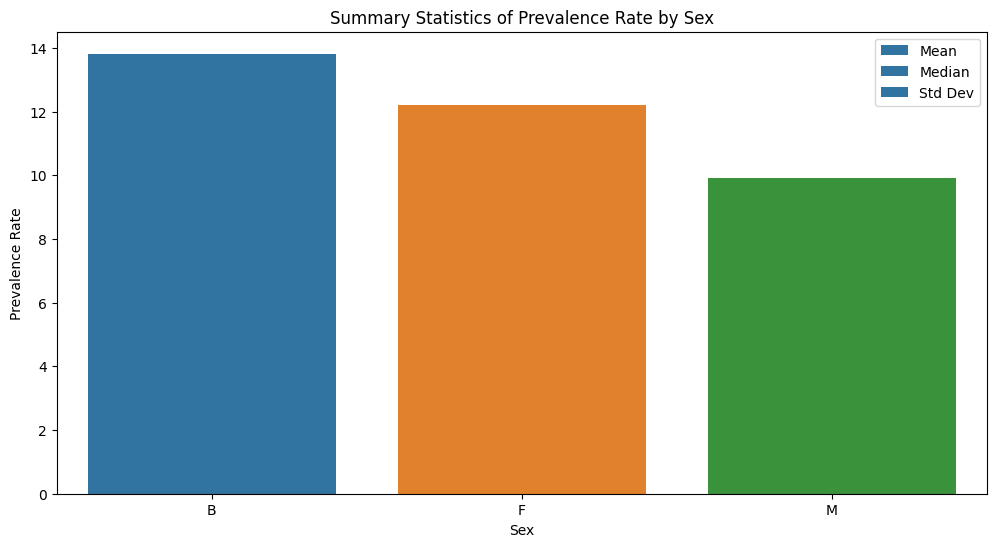

In [26]:
summary_stats_by_sex.columns = ['_'.join(col).strip() for col in summary_stats_by_sex.columns.values]
plt.figure(figsize=(12, 6))
sns.barplot(x=summary_stats_by_sex.index, y='Prevalence Rate_mean', data=summary_stats_by_sex, label='Mean')
sns.barplot(x=summary_stats_by_sex.index, y='Prevalence Rate_median', data=summary_stats_by_sex, label='Median')
sns.barplot(x=summary_stats_by_sex.index, y='Prevalence Rate_std', data=summary_stats_by_sex, label='Std Dev')
plt.title('Summary Statistics of Prevalence Rate by Sex')
plt.ylabel('Prevalence Rate')
plt.legend()
plt.show()

# Visualization 7
# Total Sample Size by Sex

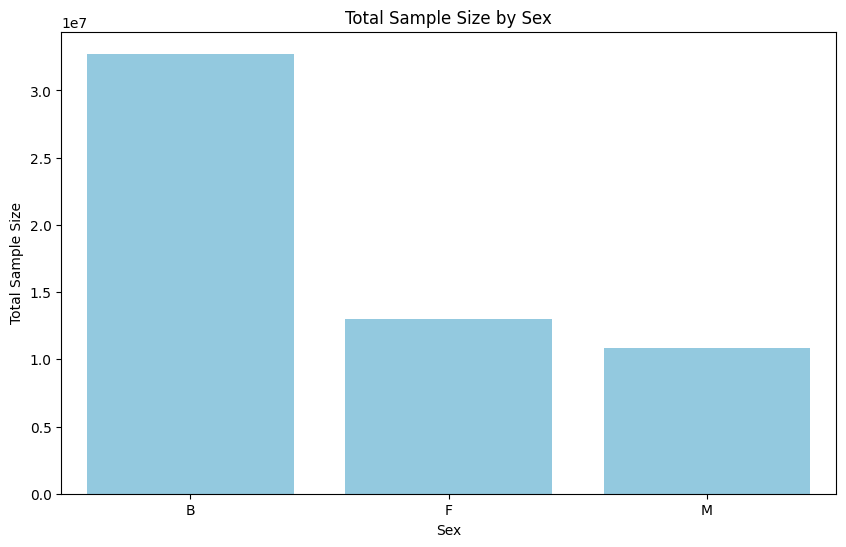

In [27]:
plt.figure(figsize=(10, 6))
sns.barplot(x=summary_stats_by_sex.index, y='Sample Size_sum', data=summary_stats_by_sex, color='skyblue')
plt.title('Total Sample Size by Sex')
plt.ylabel('Total Sample Size')
plt.show()

In [28]:
pip install lifelines

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 350.7/350.7 kB 5.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 91.0/91.0 kB 5.6 MB/s eta 0:00:00
  Created wheel for autograd-gamma: filename=autograd_gamma-0.5.0-py3-none-any.whl size=4031 sha256=d1ab6545448f18c85177782fe5b3811b98dbd5ead861405810b10009b548e300
  Stored in directory: /root/.cache/pip/wheels/25/cc/e0/ef2969164144c899fedb22b338f6703e2b9cf46eeebf254991
Successfully built autograd-gamma


# Machine Learning Tasks

First, I extracted the 'No_of_deaths_median' and 'No_of_livings_median' columns as your feature data (X) and the 'Prevalence Rate' column as your target data (y). I split this data into training and test sets to use for machine learning model evaluation. Next, I trained a LinearRegression model to predict 'Prevalence Rate' based on the median deaths and median livings features. I fit this model on the training data. This allows you to predict HIV prevalence rates given data on population deaths and livings.

After that, I performed K-means clustering to group the data into 3 clusters based on the same median deaths and median livings features. This clusters countries by their population death and living patterns to analyze groups. The cluster labels were added to the dataset. I then constructed a Kaplan-Meier survival function estimate plot over time based on the observed HIV cases over years. This visualizes the probability of survival over years.

Finally, I created a scatter plot with a regression line showing the relationship between median deaths and median livings. This visualizes the correlation trend between the two variables.

In [29]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.cluster import KMeans
from lifelines import KaplanMeierFitter
import plotly.express as px

In [30]:
# training and testing the data
X = hiv_joined_2018[['No_of_deaths_median', 'No_of_livings_median']]
y = hiv_joined_2018['Prevalence Rate']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [31]:
#fitting the linear model
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [32]:
kmeans = KMeans(n_clusters=3)
hiv_joined_2018['Cluster'] = kmeans.fit_predict(X)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [33]:
T = hiv_joined_2018['Year']
E = hiv_joined_2018['Num Cases'].astype(bool)

In [34]:
kmf = KaplanMeierFitter()
kmf.fit(durations=T, event_observed=E)

<lifelines.KaplanMeierFitter:"KM_estimate", fitted with 3110 total observations, 119 right-censored observations>

# Visualization 8
# Survival Function

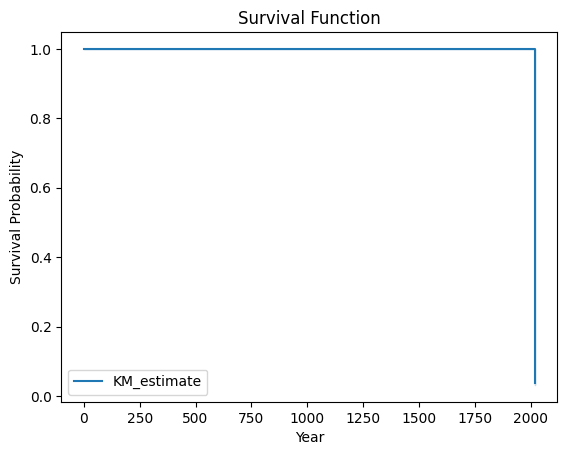

In [35]:
kmf.plot_survival_function()
plt.title('Survival Function')
plt.xlabel('Year')
plt.ylabel('Survival Probability')
plt.show()

# Visualization 9
# Scatter Plot with Regression Line

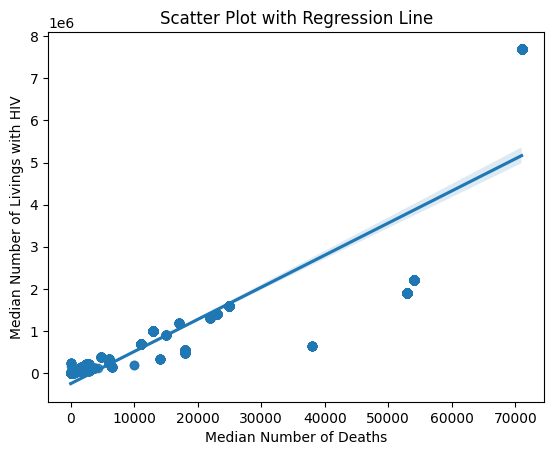

In [36]:
sns.regplot(x='No_of_deaths_median', y='No_of_livings_median', data=hiv_joined_2018)
plt.title('Scatter Plot with Regression Line')
plt.xlabel('Median Number of Deaths')
plt.ylabel('Median Number of Livings with HIV')
plt.show()

# Conclusion

Some Key Conclusions are:

1. HIV remains a major global health concern, with over 1.7 million new cases in 2018 and uneven distribution of disease burden. Sub-Saharan Africa accounted for over two-thirds of new HIV cases, pointing to needs for targeted interventions.
2. Median number of HIV-related deaths was highest in the WHO African region compared to other WHO regions in 2018. This further highlights the disproportionate impact of HIV in parts of Africa.
3. Females had higher mean and median HIV prevalence rates compared to males globally in 2018, indicating a need to address gender inequities driving transmission.
4. Probabilistic modeling of case counts over time shows gradually improving survival for those living with HIV. However widespread access to care and treatment is still lacking.
5. There is a strong negative correlation globally between median number of deaths and median number of people living with HIV across countries. This indicates countries with higher mortality have lower detection and treatment rates.

In summary, advanced modeling and data analysis reveals ongoing unmet needs to combat HIV transmission, mortality, and geographic inequalities in the global response. Targeted interventions and capacity building tailored to local contexts can help bend the curve. Continued monitoring, evaluation and strategic resource allocation is key.